# <hi><u> Wine Quality Prediction: A Machine Learning Techiniqes</u></h1>

## Name:Anakha A Pillai 


## Oganization:Entri Elevate 

## Date:

## Project Overview:
                    This project focuses on using machine learning to predict the quality of wine based on its chemical properties, such as alcohol content, acidity, and pH levels. The goal is to create a model that can accurately predict wine quality, helping winemakers improve production. The project will explore different machine learning models to find the best one for predicting wine quality.


## Objective:
             The objective is to develop a machine learning model that can predict wine quality based on its chemical properties, helping producers assess and improve their wine.


## Data Description:

## Source:

The Wine Quality Dataset is available from the UCI Machine Learning Repository:
Wine Quality Dataset


## Features:

The dataset contains the following features:

1. Fixed Acidity – Amount of fixed acids in the wine.


2. Volatile Acidity – Amount of volatile acids in the wine.


3. Citric Acid – Amount of citric acid in the wine.


4. Residual Sugar – Amount of sugar remaining after fermentation.


5. Chlorides – Salt content in the wine.


6. Free Sulfur Dioxide – Amount of free sulfur dioxide in the wine.


7. Total Sulfur Dioxide – Total amount of sulfur dioxide in the wine.


8. Density – Density of the wine.


9. pH – pH level of the wine.


10. Sulphates – Amount of sulphates in the wine.


11. Alcohol – Alcohol content in the wine.


12. Quality – The target variable, which represents the quality of the wine (on a scale from 0 to 10).



# Import Libraries


In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score,roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

# Load dataset

In [15]:
data =pd.read_csv('winequality-red.csv',sep=";")

In [16]:
print(data.head(10))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

In [17]:
data.shape

(1599, 12)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
# check the missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [20]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
# Finding duplicate
data.duplicated().sum()

240

In [22]:
#Remove duplicate row
data=data.drop_duplicates()
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
data.duplicated().sum()

0

In [24]:
# Display the shape of cleaned DataFram
print(f"Shape after removing duplicates:{data.shape}")

Shape after removing duplicates:(1359, 12)


In [25]:
print(f"sum of duplicates:{data.duplicated().sum()}")

sum of duplicates:0


In [26]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


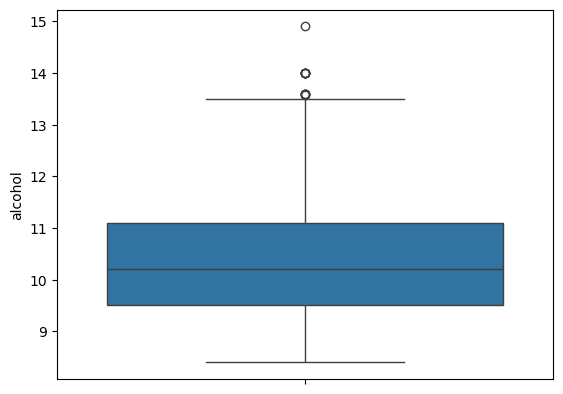

In [27]:
#check the remove outlies
sns.boxplot(data['alcohol'])
plt.show()

In [28]:
df = pd.DataFrame(data)

In [29]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [30]:
numeric_columns = df.select_dtypes(include=['number'])

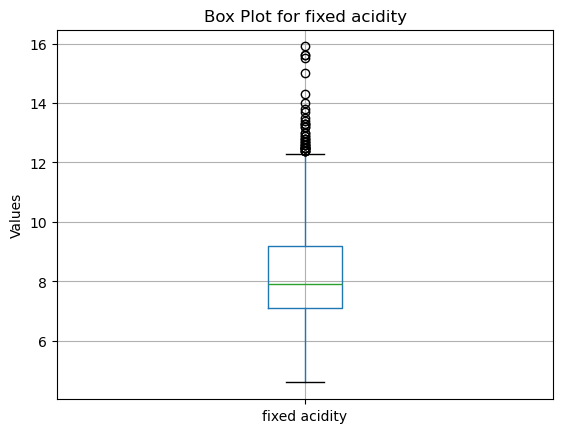

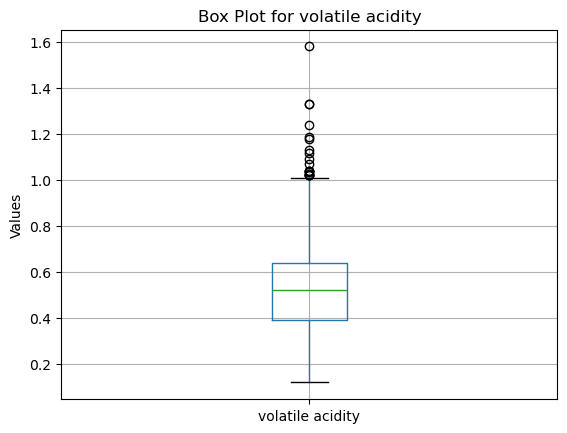

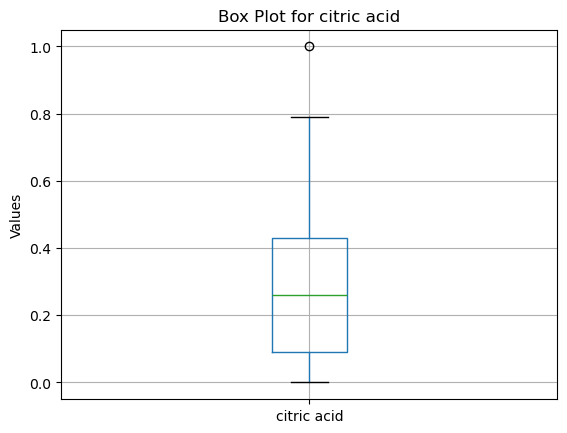

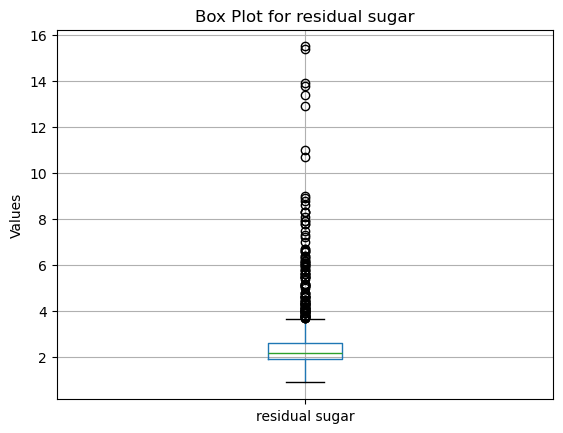

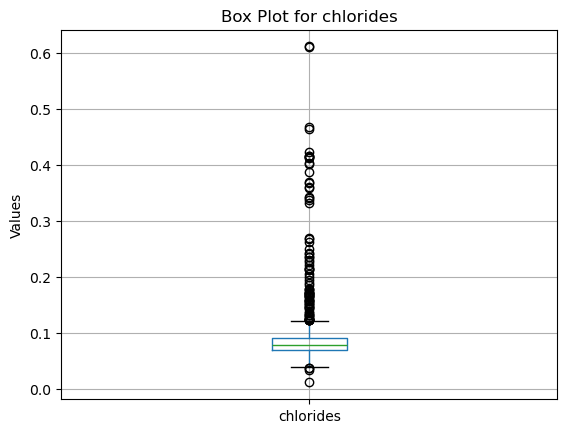

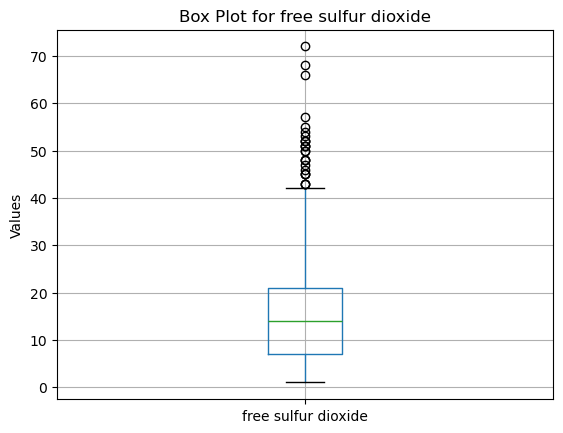

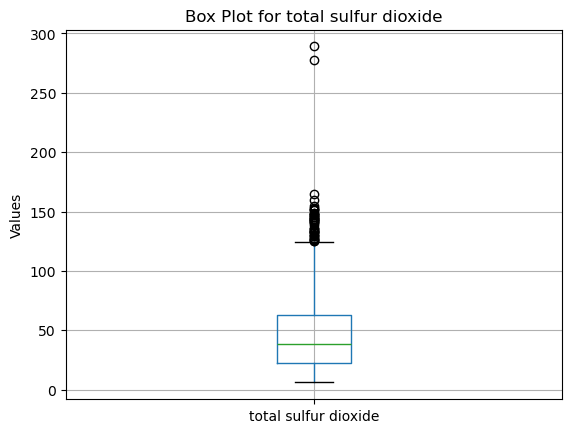

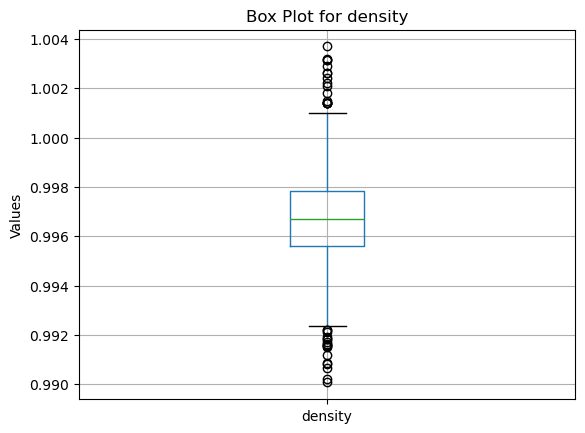

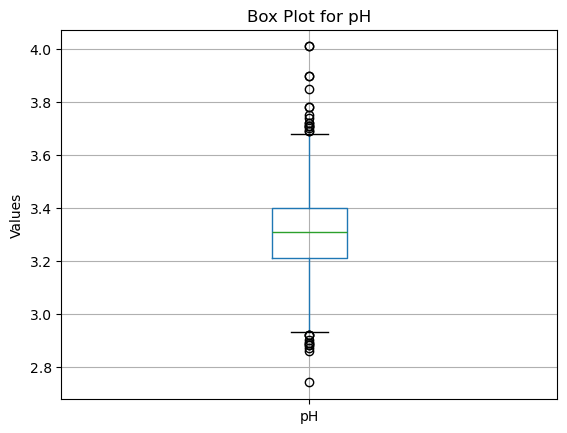

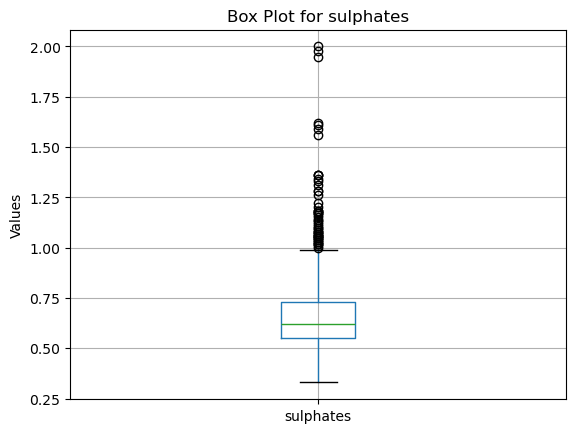

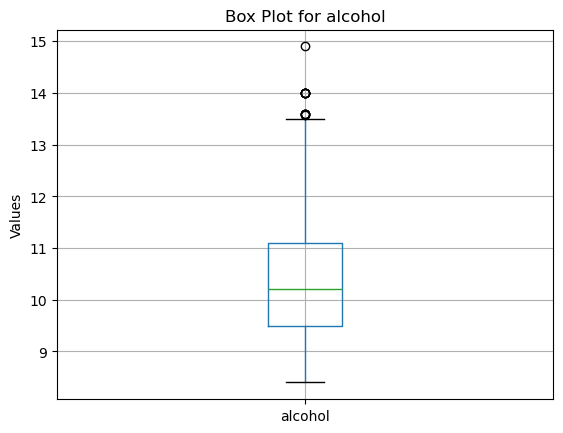

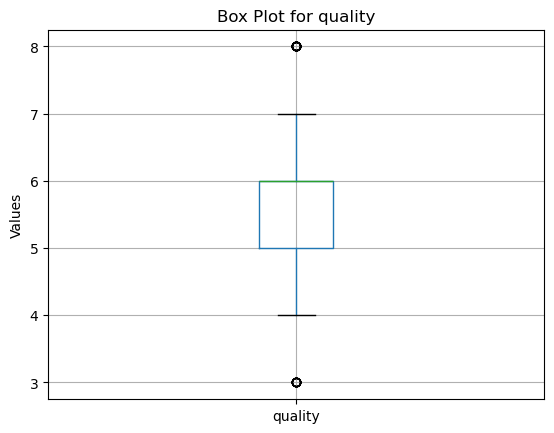

In [31]:
# forloop
# Create box plots for numerical columns using a for loop
for column in numeric_columns.columns:
    plt.figure()  # Create a new figure for each plot
    numeric_columns.boxplot(column=column)
    plt.title(f"Box Plot for {column}")
    plt.ylabel("Values")
    plt.show()

In [32]:
#Remove outliers using statistical methods like IQR
#IQR (forloop)
for column in numeric_columns.columns:
    Q1 = df['alcohol'].quantile(0.25)  # 25th percentile
    Q3 = df['alcohol'].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

In [33]:
# Replace outliers with boundaries
df['alcohol'] = np.where(
        df['alcohol'] < lower_bound, lower_bound,
        np.where(df[column] > upper_bound, upper_bound, df[column])
    )

print("Fixed DataFrame:")
print(df)

Fixed DataFrame:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free

## visualize data distribution

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

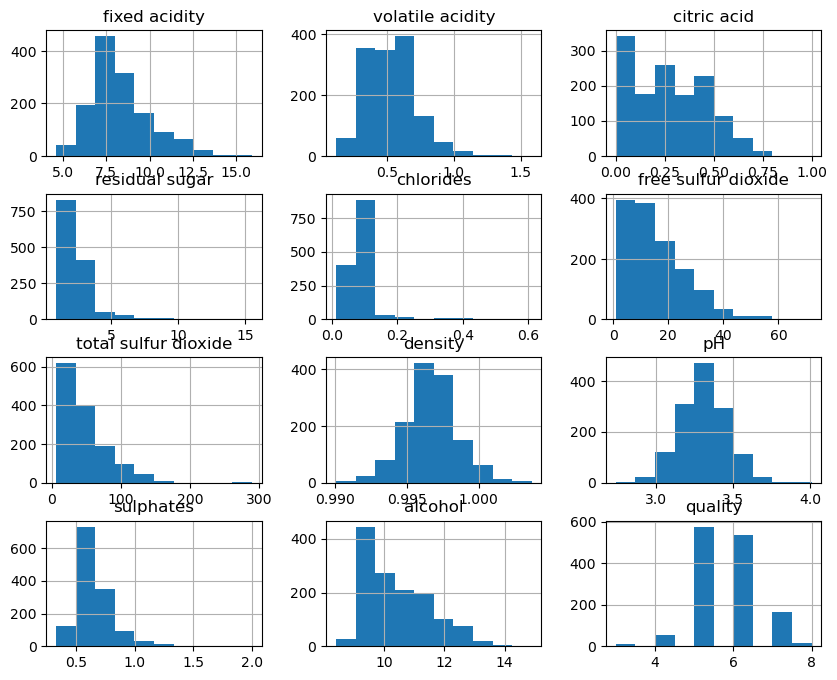

In [35]:
#histrograms
data.hist(figsize=(10,8))

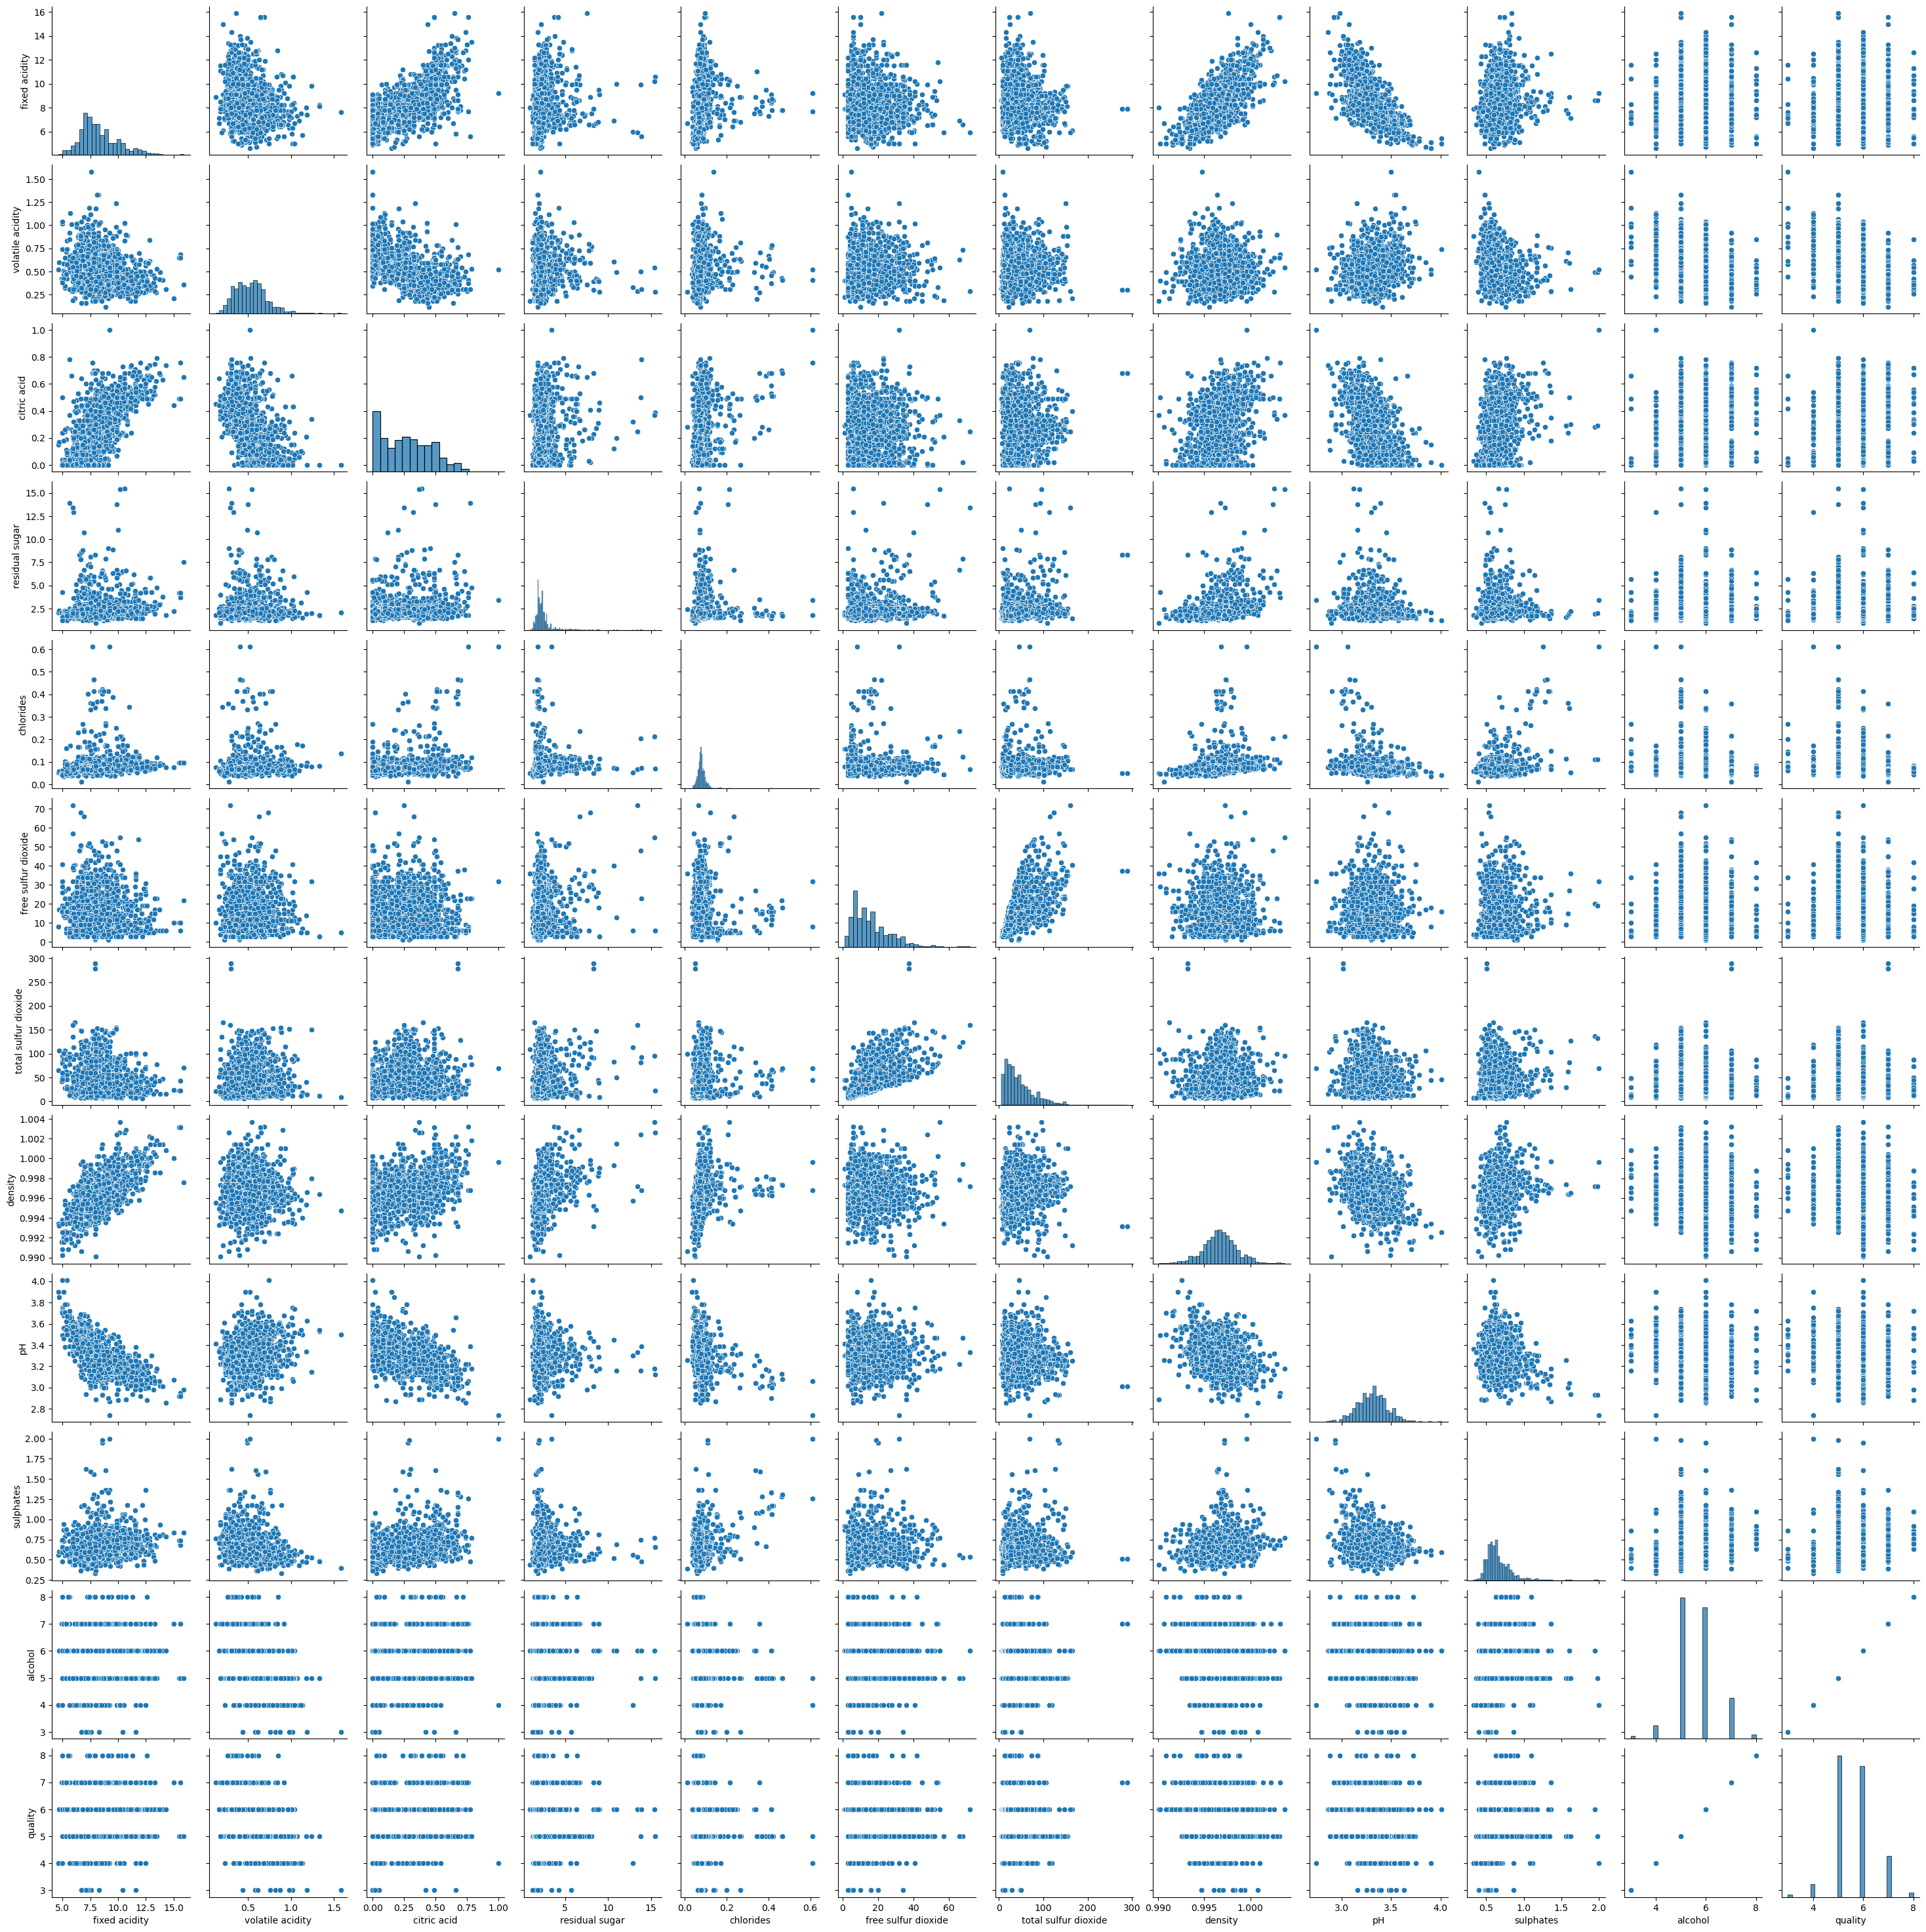

In [36]:
# Pairplot

sns.pairplot(df)

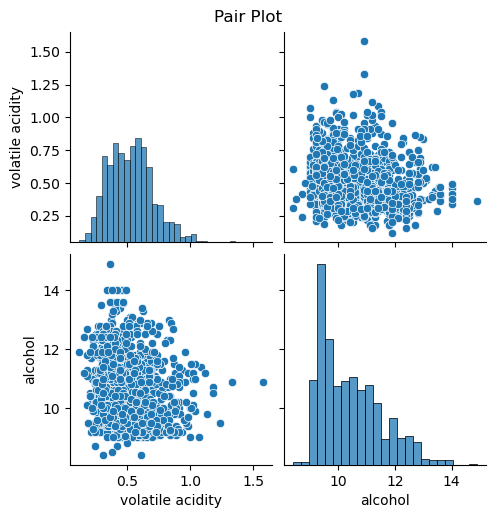

In [37]:
sns.pairplot(data[['volatile acidity','alcohol']])
plt.suptitle('Pair Plot', y=1.02)
plt.show()



<Axes: ylabel='Density'>

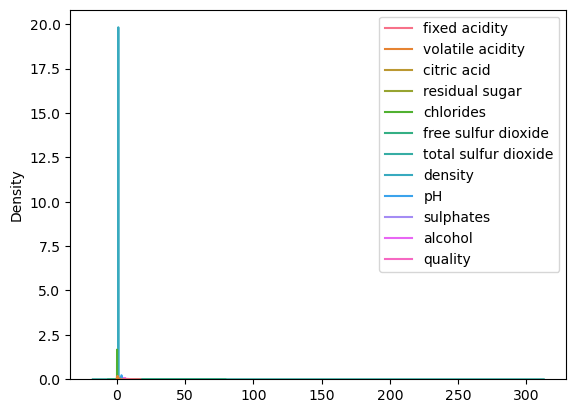

In [38]:
sns.kdeplot(df)

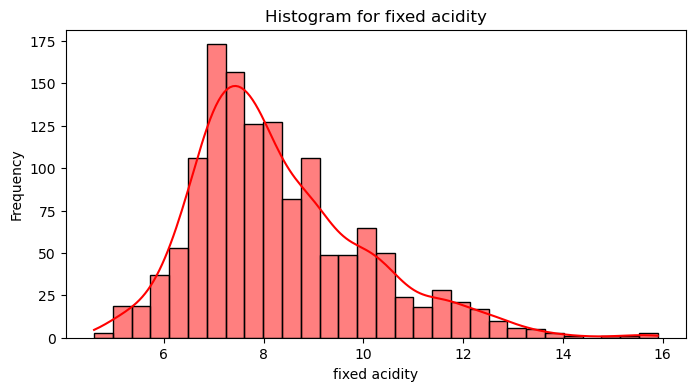

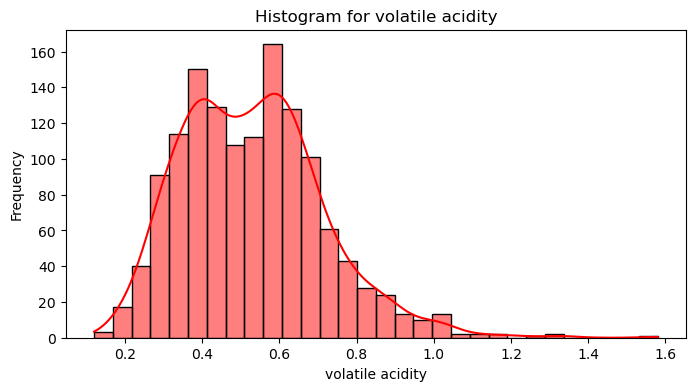

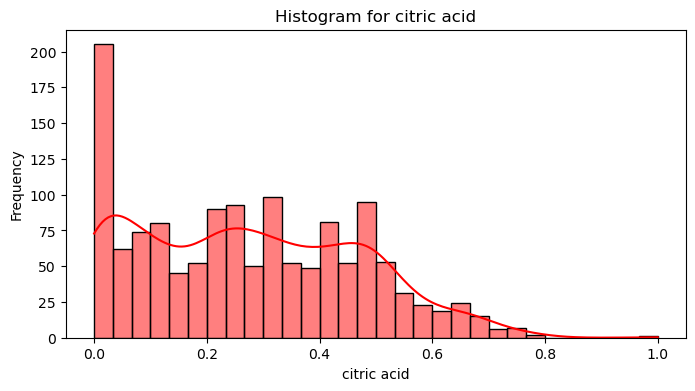

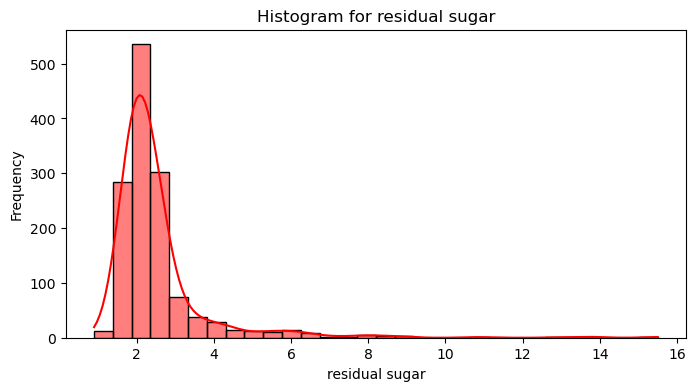

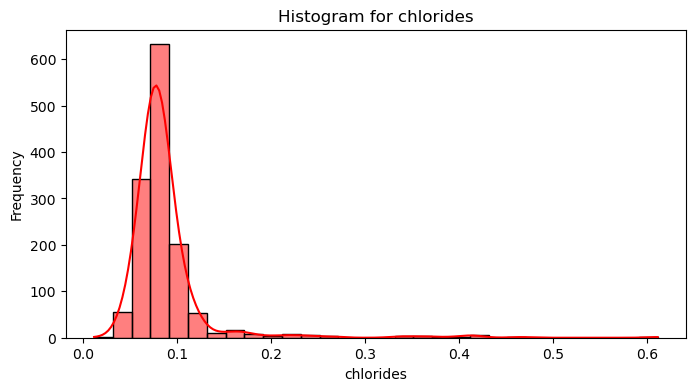

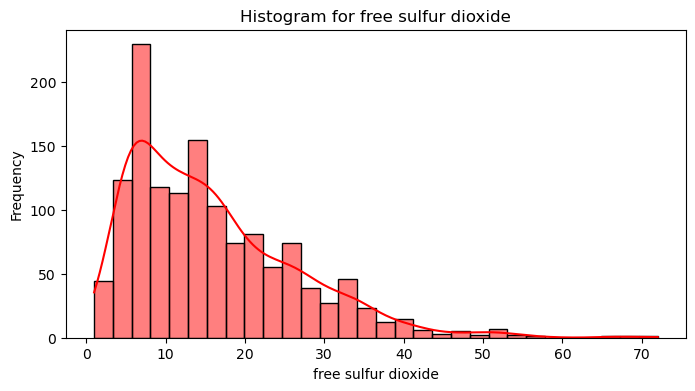

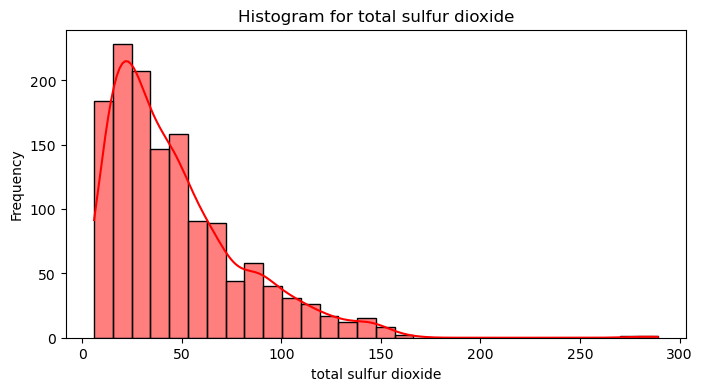

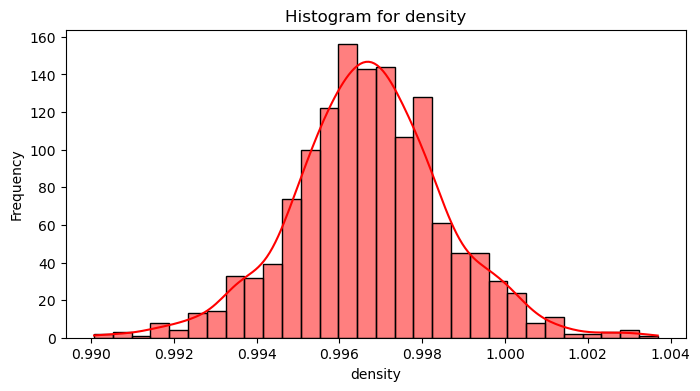

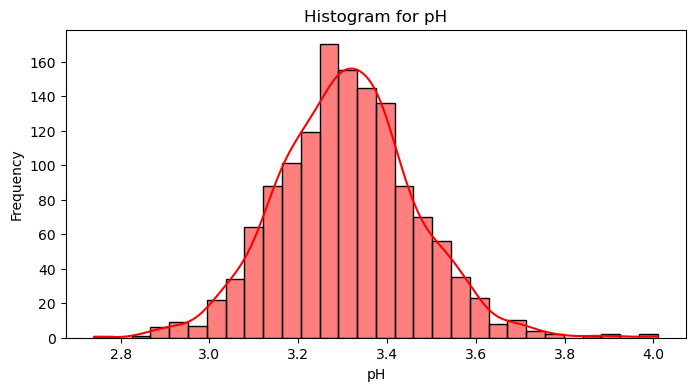

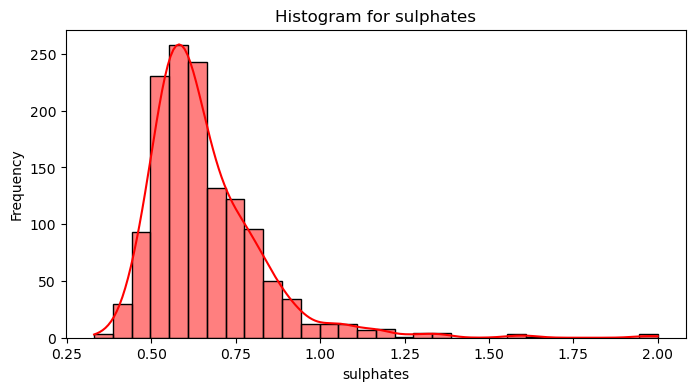

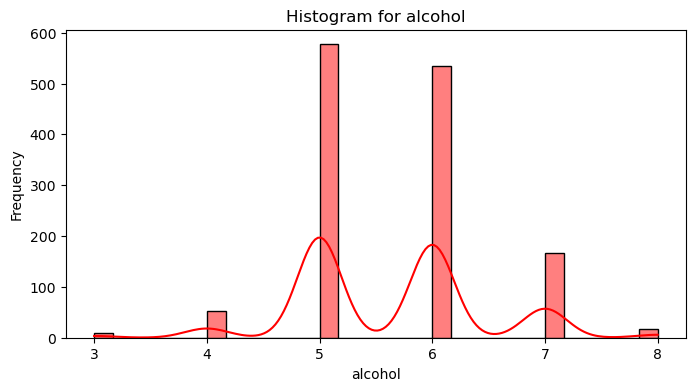

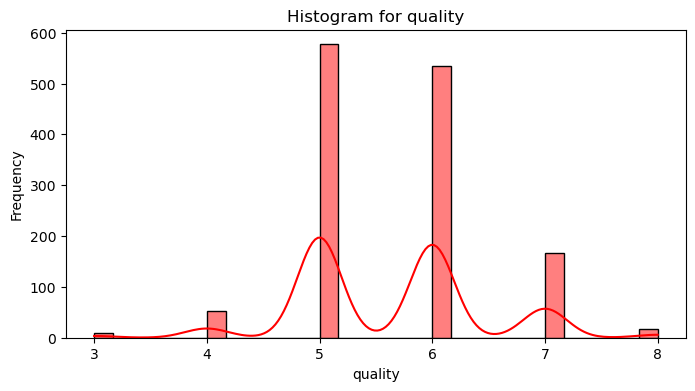

In [39]:
for column in numeric_columns:
    plt.figure(figsize=(8, 4))  # Set figure size
    sns.histplot(data=df, x=column, kde=True, bins=30,color='red')  # Histogram with KDE
    plt.title(f"Histogram for {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

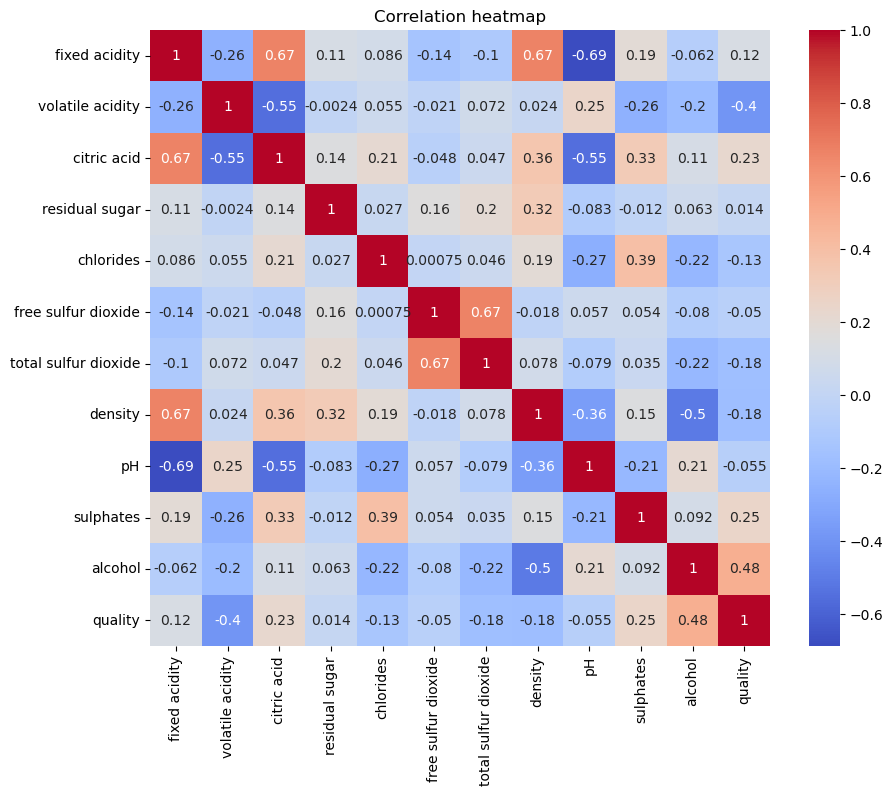

In [40]:
#correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

In [41]:
#check  class distribution
print (data["quality"].value_counts())

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64


## FRATURE SELECTION 


In [43]:
#split data into fratures and target
X= data.drop('quality', axis=1)
y= data['quality']



In [44]:
y_binary=(y>=6).astype(int)

In [45]:
#spilit into training and testing sets
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)
# Display the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (1087, 11)
X_test shape: (272, 11)
y_train shape: (1087,)
y_test shape: (272,)


In [46]:
#FRATURE SELECTION USING RAMDOMFOREST
rf = RandomForestClassifier(n_estimators=100,random_state=45,max_depth=5)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=45)

## In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
## On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


In [48]:
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                 Feature  Importance
10               alcohol    0.276931
6   total sulfur dioxide    0.132124
9              sulphates    0.128103
1       volatile acidity    0.114576
7                density    0.076294
4              chlorides    0.053390
0          fixed acidity    0.053014
2            citric acid    0.049797
8                     pH    0.044595
3         residual sugar    0.035825
5    free sulfur dioxide    0.035350


In [49]:
selector = SelectFromModel(rf, threshold=0.01)  # Select features above the mean importance
selector.fit(X_train, y_train)

# Transform data to keep selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [50]:
X_train_selected

array([[ 8.9 ,  0.38,  0.4 , ...,  3.27,  0.75, 12.6 ],
       [ 6.6 ,  0.7 ,  0.08, ...,  3.44,  0.58, 10.2 ],
       [ 6.8 ,  0.56,  0.03, ...,  3.44,  0.63, 10.  ],
       ...,
       [ 6.8 ,  0.47,  0.08, ...,  3.3 ,  0.65,  9.6 ],
       [ 8.9 ,  0.32,  0.31, ...,  3.17,  0.55, 10.4 ],
       [ 9.1 ,  0.34,  0.42, ...,  3.18,  0.55, 11.4 ]])

# scaling

In [52]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_selected)
X_test_scaled=scaler.fit_transform(X_test_selected)
# Display shapes to confirm
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (1087, 11)
X_test_scaled shape: (272, 11)


# model buliding

In [54]:
print("\nTraining models...")
models = {
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42,max_depth=5),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100,
                               max_depth=10,
                               random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100,
                                    learning_rate=0.1,
                                    max_depth=3,
                                    random_state=42),
    
    'SVC': SVC(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'BaggingClassifier':BaggingClassifier(random_state=42)
    

}


Training models...


# calculate matrix values of each models using for loop

In [56]:
results = {}

for name, model in models.items():
    print(f"Training model: {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Model evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Store results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T # Transpose to make models as rows
print("Model Evaluation Results:")
print(results_df)

Training model: LogisticRegression...
Training model: DecisionTreeClassifier...
Training model: RandomForestClassifier...
Training model: GradientBoostingClassifier...
Training model: SVC...
Training model: AdaBoostClassifier...
Training model: KNeighborsClassifier...
Training model: BaggingClassifier...
Model Evaluation Results:
                            Accuracy  Precision    Recall  F1 Score
LogisticRegression          0.602941   0.280022  0.286082  0.281806
DecisionTreeClassifier      0.602941   0.341618  0.333544  0.335250
RandomForestClassifier      0.625000   0.312046  0.296478  0.297176
GradientBoostingClassifier  0.617647   0.324845  0.311574  0.315648
SVC                         0.632353   0.330608  0.322722  0.323375
AdaBoostClassifier          0.536765   0.249958  0.246598  0.247867
KNeighborsClassifier        0.562500   0.329967  0.297536  0.301161
BaggingClassifier           0.606618   0.334500  0.292341  0.298649


In [57]:
#finding best model from the model list based on accuracy
best_model_name = max(results.items(), key=lambda x: x[1]['Accuracy'])[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: SVC


Training names:LogisticRegression...


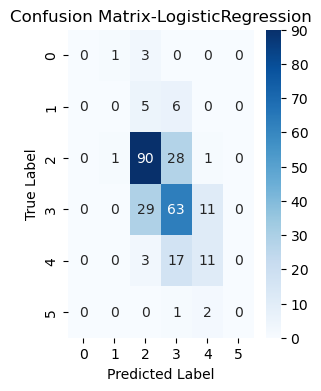

Training names:DecisionTreeClassifier...


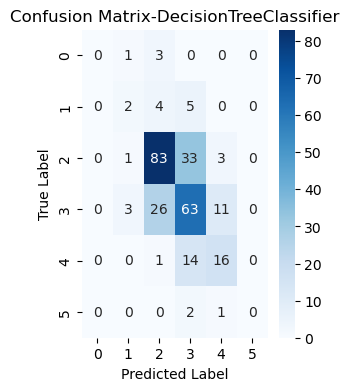

Training names:RandomForestClassifier...


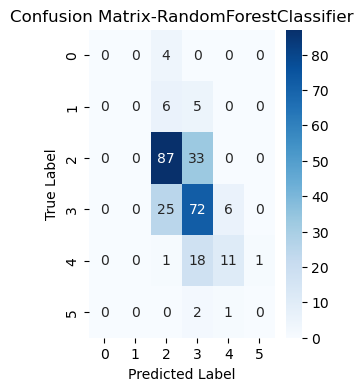

Training names:GradientBoostingClassifier...


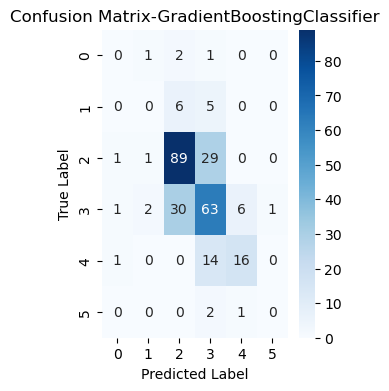

Training names:SVC...


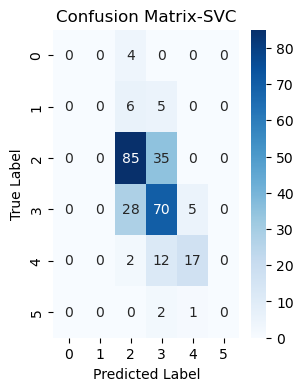

Training names:AdaBoostClassifier...


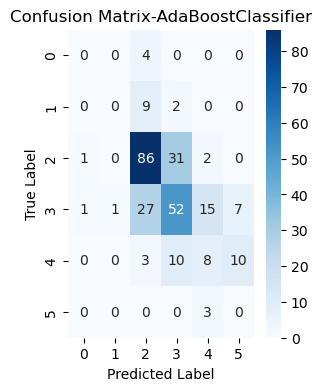

Training names:KNeighborsClassifier...


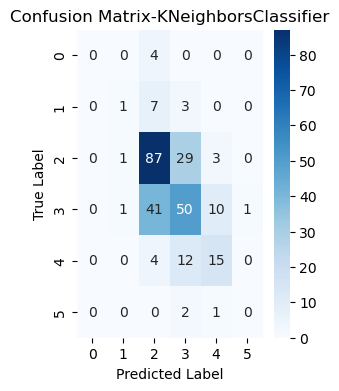

Training names:BaggingClassifier...


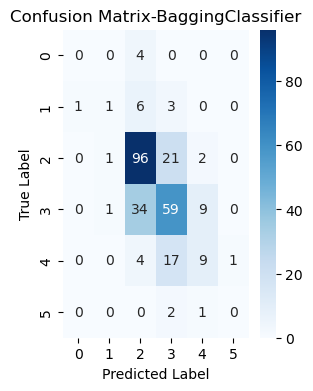

In [58]:
results={}
for name,model in models.items():
    print(f"Training names:{name}...")
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    #model Evaluation
    cm = confusion_matrix(y_test, y_pred)
    results[name]={
        
        'confusion_matrix': cm
    }
    plt.figure(figsize=(3,4))
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
    plt.title(f'Confusion Matrix-{name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()  

In [59]:
results_df = pd.DataFrame(results).T
print(results_df)

                                                             confusion_matrix
LogisticRegression          [[0, 1, 3, 0, 0, 0], [0, 0, 5, 6, 0, 0], [0, 1...
DecisionTreeClassifier      [[0, 1, 3, 0, 0, 0], [0, 2, 4, 5, 0, 0], [0, 1...
RandomForestClassifier      [[0, 0, 4, 0, 0, 0], [0, 0, 6, 5, 0, 0], [0, 0...
GradientBoostingClassifier  [[0, 1, 2, 1, 0, 0], [0, 0, 6, 5, 0, 0], [1, 1...
SVC                         [[0, 0, 4, 0, 0, 0], [0, 0, 6, 5, 0, 0], [0, 0...
AdaBoostClassifier          [[0, 0, 4, 0, 0, 0], [0, 0, 9, 2, 0, 0], [1, 0...
KNeighborsClassifier        [[0, 0, 4, 0, 0, 0], [0, 1, 7, 3, 0, 0], [0, 1...
BaggingClassifier           [[0, 0, 4, 0, 0, 0], [1, 1, 6, 3, 0, 0], [0, 1...


In [60]:
# Train a Random Forest model 
model = SVC() 
model.fit(X_train_scaled, y_train) 

# Predict on training and test sets 
y_train_pred = model.predict(X_train_scaled) 
y_test_pred = model.predict(X_test_scaled) 

# Calculate metrics 
train_mse = mean_squared_error(y_train, y_train_pred) 
test_mse = mean_squared_error(y_test, y_test_pred) 

print(f"Training MSE: {train_mse}") 
print(f"Test MSE: {test_mse}")

Training MSE: 0.46458141674333026
Test MSE: 0.5110294117647058


## Hyperperameter Tuning

### Define the parameter grid for Grid Search

In [63]:

param_grid = {
    'C': [0.1, 1, 10, 100], # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Kernel types
    'gamma': ['scale', 'auto'], # Kernel coefficient
    'degree': [2, 3, 4] # Degree of the polynomial kernel (if kernel='poly')
}
    

### Initialize the Grid Search

In [65]:

grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)


###  Fit the Grid Search to the data

In [67]:

grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

### Get the best parameters and score

In [69]:

best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: -0.5914936794486957


## Evaluate the best model

### Train the best model from Grid Search on the entire training data

In [72]:

best_model = SVC()
best_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_test = best_model.predict(X_test)



### Evaluate the model

In [74]:

test_f1 = f1_score(y_test, y_test_pred,average='weighted')

print(f"F1: {test_f1}")
test_accuracy = accuracy_score(y_test,y_test_pred)
print(f"Teat Accuracy:{test_accuracy}")

F1: 0.6297229219143576
Teat Accuracy:0.45955882352941174


## Pipeline

In [76]:
# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                # Scale the features
    ('model', SVC())           # SVC
])
# Train the pipeline
pipeline.fit(X_train, y_train)
# Predict on test data
y_pred = pipeline.predict(X_test)


In [77]:
# Assuming X_train is a DataFrame with column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Now you can access column names
print(X_train_scaled_df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [78]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [79]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', SVC())])

In [80]:
y_pred=pipeline.predict(X_test)

### Save the entire pipeline

In [82]:
joblib.dump(pipeline, 'SVC_pipeline.joblib')

['SVC_pipeline.joblib']

## Load the pipeline

In [84]:

loaded_pipeline = joblib.load('SVC_pipeline.joblib')

### Unseen data prediction

In [124]:
#  Load unseen data
unseen_data = pd.read_csv("unseen_wine_data.csv")

# Step 3: Ensure unseen data matches the training data format
# Drop target column if present (if you loaded unseen data with quality for evaluation)
if 'quality' in unseen_data.columns:
    unseen_data = unseen_data.drop(columns=['quality'])




### Display the result

In [126]:
prediction = pipeline.predict(unseen_data)

In [136]:
print(f'predicted_quality:{prediction[0]}')

predicted_quality:5


In [128]:
#  Save predictions (optional)
unseen_data['predicted_quality'] = predictions
unseen_data.to_csv("predicted_wine_quality.csv", index=False)

print("Predictions saved to 'predicted_wine_quality.csv'")

Predictions saved to 'predicted_wine_quality.csv'
